In [1]:
# std libs
import os
import sys
import glob

# always good to have
import numpy as np
import pandas as pd

# ploting libs
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Tadpose library
import tadpose

In [6]:

%load_ext autoreload
%autoreload 2

### Basic definitions

In [8]:
# main input required. SLEAP naysis file is expected to be in same folder with ending ".predictions.analysis.h5"
video_fn = "B:/fs3-bifexchgrp/BIF_StaffSci/Christoph/sweengrp/tadpose_examples/050_29-11-21_2-45pm_WT_Stg61_2.mp4"

In [9]:
# create tad object
tad = tadpose.Tadpole.from_sleap(video_fn)

In [12]:
# create aligner by giving to part names and their correpsonding alignment location
aligner = tadpose.alignment.RotationalAligner(central_part="Tail_Stem",aligned_part="Heart_Center", align_to=(0,1))

# assign alinger to tad
tad.aligner = aligner

Aligning animals:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
# list of body part names
print("Bodyparts")
bodyparts = tad.bodyparts
for bp in bodyparts:
    print(f" - {bp}")
print()

# bodypart locations in Frames x bodyparts x 2
print("Raw locations")
locs = tad.locs()
print(locs.shape, " = Frames x bodyparts x 2", "\n")

# to get locations use:
print("Single raw locations")
heart_loc = tad.locs(parts=("Heart_Center",))
print(heart_loc.shape, "\n")

print("Get all ego-centric locations")
ego_locs = tad.ego_locs(track_idx=0, fill_missing=False)
print(ego_locs.shape, "\n")


print("Get selected ego-centric left limb locations")
ego_locs_left_leg = tad.ego_locs(
    track_idx=0, parts=("Left_Hip", "Left_Knee", "Left_Ankle", "Left_toe"), fill_missing=True
)
print(ego_locs_left_leg.shape, "\n")

Bodyparts
 - Right_Eye
 - Left_Eye
 - Heart_Center
 - Tail_Stem
 - Right_Hand
 - Right_Wrist
 - Right_Elbow
 - Right_Shoulder
 - Left_Hand
 - Left_Wrist
 - Left_Shoulder
 - Right_Hip
 - Right_Knee
 - Right_Ankle
 - Right_Foot
 - Left_Hip
 - Left_Knee
 - Left_Ankle
 - Left_Foot
 - Left_Elbow
 - Left_toe
 - Right_toe
 - Tail_1
 - Tail_2
 - Tail_3
 - Tail_4
 - Tail_5
 - Tail_6
 - Tail_7
 - Tail_8
 - Tail_9
 - Tail_10
 - Tail_Tip

Raw locations
(215995, 33, 2)  = Frames x bodyparts x 2 

Single raw locations
(215995, 1, 2) 

Get all ego-centric locations
(215995, 33, 2) 

Get selected ego-centric left limb locations
(215995, 4, 2) 



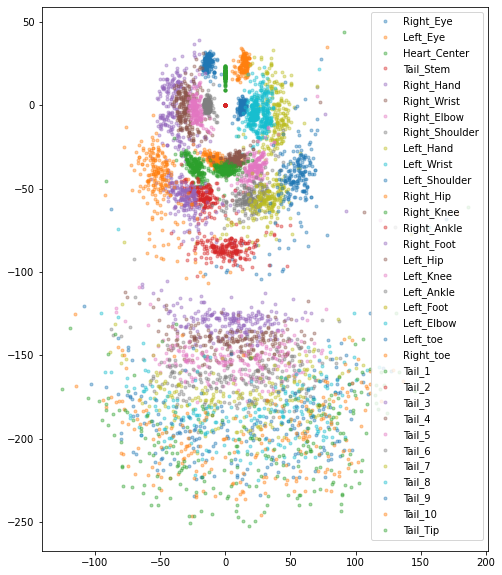

In [22]:
# plot aligned every 1000th locations for all bodyparts
f, ax = plt.subplots(figsize=(8, 10))
for pi, p in enumerate(tad.bodyparts):
    ax.plot(*ego_locs[::1000, pi].T, "." , alpha=0.4, label=p)
ax.legend()

### Extract features

<AxesSubplot:>

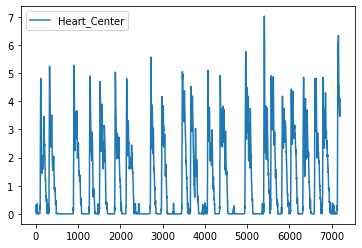

In [50]:
# get heart speed (not ego-centric) for first 2 min
heart_speed_df = tadpose.analysis.speeds(tad, parts=("Heart_Center",))

# plot it
heart_speed_df[:3600*2].plot()

array([[<AxesSubplot:title={'center':'Heart_Center'}>]], dtype=object)

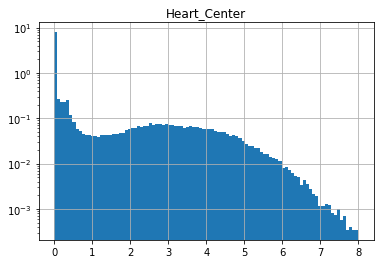

In [29]:
# plot heart speed distribution / useful for finding threshold
heart_speed_df.hist(bins=np.linspace(0,8, 100), density=True, log=True)

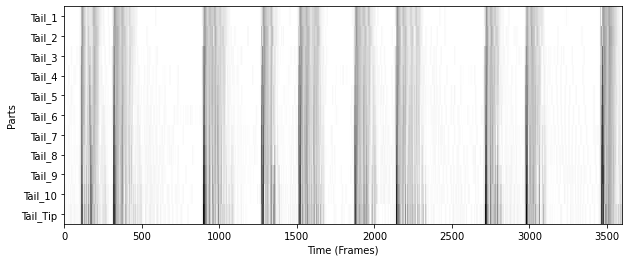

In [37]:
# get ego-centric speed for some parts of first 5 min
parts_for_speed = [
    "Tail_1",
    "Tail_2",
    "Tail_3",
    "Tail_4",
    "Tail_5",
    "Tail_6",
    "Tail_7",
    "Tail_8",
    "Tail_9",
    "Tail_10",
    "Tail_Tip",
]

speeds = tadpose.analysis.speeds(tad, parts_for_speed)[:60*60*1]

# plot them as heatmap
f, ax = plt.subplots(figsize=(10,4))
im = ax.imshow(
    speeds.T,
    aspect="auto",
    interpolation="nearest",
    cmap="gray_r",
)
ax.set_xlabel("Time (Frames)")
ax.set_ylabel("Parts")
ax.set_yticks(np.arange(len(parts_for_speed)))
ax.set_yticklabels(parts_for_speed);

<AxesSubplot:>

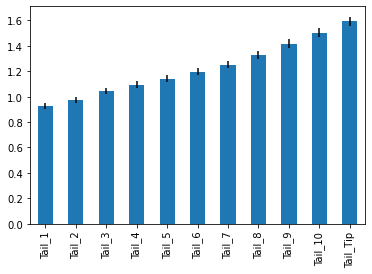

In [43]:
# plot them mean/std bar plot
speeds.mean().plot.bar(yerr=speeds.sem())